# CS5346: OTOT Assignment A3

# Placement of MBA Students

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib

In [2]:
print(matplotlib.__version__)

3.5.1


In [3]:
df = pd.read_csv(r"Placement_Data.csv")
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df['status'].value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

From the cell above we can see that out of the 215 studentsin this dataset, 148 students received job offers and 67 students did not recieve job offers.

## Query 1: Does prior work experiece affect job placement chances?

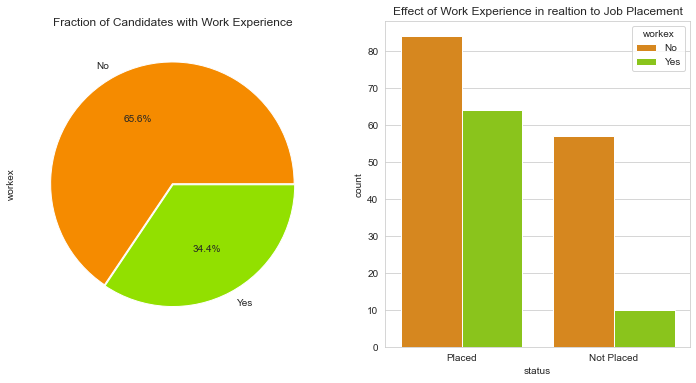

In [5]:
sns.set_style('whitegrid')

colors = ['#f58b00','#92e000']


f,ax=plt.subplots(1,2,figsize=(12,6))
df['workex'].value_counts().plot.pie(explode=[0,0.01],autopct='%1.01f%%',ax=ax[0],colors=colors)
sns.countplot(x = 'status',hue = "workex",data = df,palette=colors)

ax[0].set_title('Fraction of Candidates with Work Experience')
ax[1].set_title('Effect of Work Experience in realtion to Job Placement')


plt.show()

## Query 2: Does the MBA Score of candidates affect their placement opportunities?

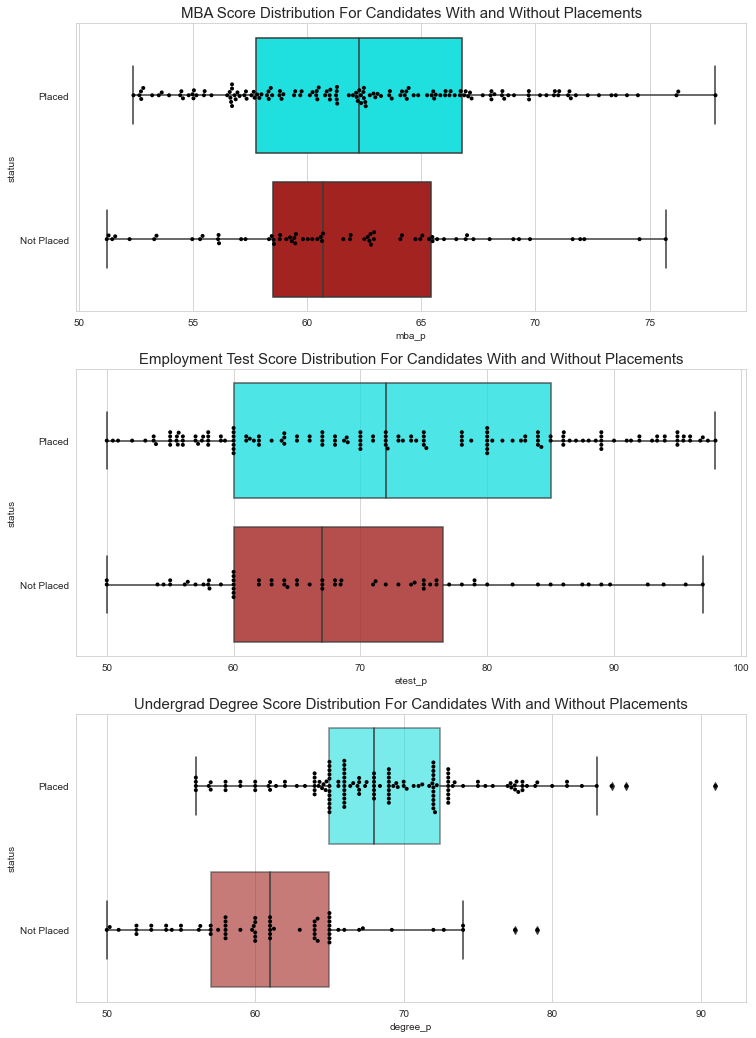

In [6]:

sns.set_style('whitegrid')
f,ax=plt.subplots(3,1,figsize=(12,18))

colors = ['#00FFFF','#b90e0a']


sns.boxplot(y = "status",x = 'mba_p',data = df, ax=ax[0], boxprops=dict(alpha=1), palette = colors)
sns.swarmplot(y = "status",x = 'mba_p',data = df, ax=ax[0], size = 4,color = 'black')
ax[0].set_title("MBA Score Distribution For Candidates With and Without Placements", fontsize=15)



sns.boxplot(y = "status",x = 'etest_p',data = df, ax=ax[1],  boxprops=dict(alpha=.8),palette = colors)
sns.swarmplot(y = "status",x = 'etest_p',data = df, ax=ax[1], size = 4,color = 'black')
ax[1].set_title("Employment Test Score Distribution For Candidates With and Without Placements", fontsize=15)

sns.boxplot(y = "status",x = 'degree_p',data = df, ax=ax[2],  boxprops=dict(alpha=.6), palette = colors)
sns.swarmplot(y = "status",x = 'degree_p',data = df, ax=ax[2], size = 4,color = 'black')
ax[2].set_title("Undergrad Degree Score Distribution For Candidates With and Without Placements", fontsize=15)

plt.show()

## Query 3: Is there any relationship between candidates with good undergrad results, work experience and placement?

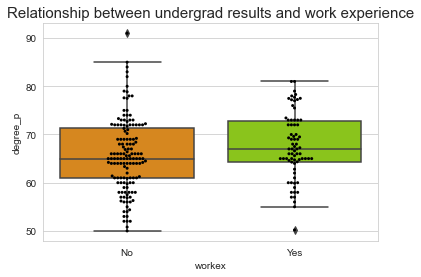

In [7]:

colors = ['#f58b00','#92e000']

my_pal = {"No": "#f58b00", "Yes": "#92e000"}

sns.boxplot(data=df, x="workex", y="degree_p", palette= my_pal)
sns.swarmplot(y = "degree_p",x = 'workex',data = df, size = 3,color = 'black')

plt.title("Relationship between undergrad results and work experience", fontsize=15)


plt.show()

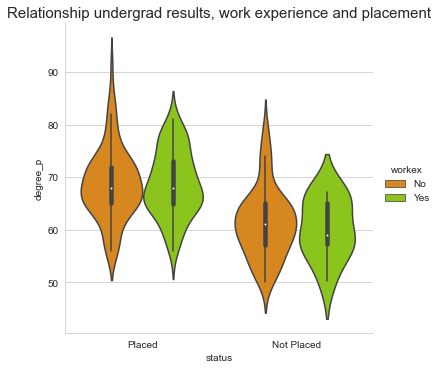

In [8]:
sns.catplot(data=df, x="status", y="degree_p", hue= 'workex', kind="violin", palette= my_pal)
plt.title("Relationship undergrad results, work experience and placement", fontsize=15)

plt.show()

## Query 4: Of the candidates that were offered jobs, did their specialization or gender affect their salaries?

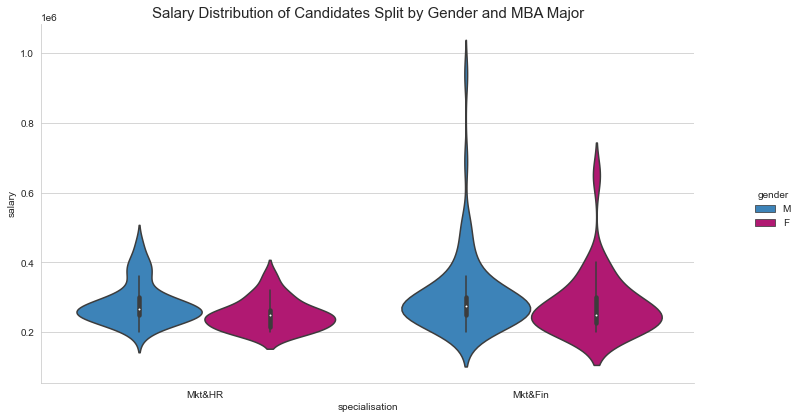

In [9]:
colors = ['#2986cc', '#c90076']

k = sns.catplot(x="specialisation", y="salary", hue = "gender", kind = "violin", box=True, data=df,palette=colors)
k.figure.set_size_inches(12,6)

plt.title("Salary Distribution of Candidates Split by Gender and MBA Major", fontsize=15)
plt.show()